In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from nltk.tokenize import word_tokenize

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import nltk
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# import Data

In [ ]:
#load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Sheet_1.csv',usecols=['response_id','class','response_text'],encoding='latin-1')


In [ ]:
df

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...
...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no..."
76,response_77,flagged,when my best friends mom past away from od'ing...
77,response_78,not_flagged,As a camp counselor I provide stability in kid...
78,response_79,flagged,My now girlfriend used to have serious addicti...


In [ ]:
df.loc[:,"response_text"] = df.response_text.apply(lambda x : str.lower(x))  # convert the words into lowercase  for stopwords


In [ ]:
df["response_text"]


0                 i try and avoid this sort of conflict
1     had a friend open up to me about his mental ad...
2     i saved a girl from suicide once. she was goin...
3     i cant think of one really...i think i may hav...
4     only really one friend who doesn't fit into th...
                            ...                        
75    now that i've been through it, although i'm no...
76    when my best friends mom past away from od'ing...
77    as a camp counselor i provide stability in kid...
78    my now girlfriend used to have serious addicti...
79    the one person i ever talked to it was because...
Name: response_text, Length: 80, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_tags(string):
    result = re.sub(r'<[^>]+>', '', string)  # remove HTML tags
    result = re.sub(r'https?://\S+', '', result)  # remove URLs
    return result

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9_\s]'  # include underscore and remove non-alphanumeric characters
    if remove_digits:
        pattern = r'[^a-zA-Z_\s]'  # include underscore and remove non-alphanumeric characters and digits
    text = re.sub(pattern, '', text)
    return text


def tokenize(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if not word in stop_words]
    return filtered_tokens

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

In [ ]:
df['new_response_text'] = df['response_text'].apply(remove_tags)
df['new_response_text'] = df['response_text'].apply(remove_special_characters)
df['new_response_text'] = df['response_text'].apply(lambda x: x.lower())

df

,response_id,class,response_text,new_response_text
0,response_1,not_flagged,i try and avoid this sort of conflict,i try and avoid this sort of conflict
1,response_2,flagged,had a friend open up to me about his mental ad...,had a friend open up to me about his mental ad...
2,response_3,flagged,i saved a girl from suicide once. she was goin...,i saved a girl from suicide once. she was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...,i cant think of one really...i think i may hav...
4,response_5,not_flagged,only really one friend who doesn't fit into th...,only really one friend who doesn't fit into th...
...,...,...,...,...
75,response_76,not_flagged,"now that i've been through it, although i'm no...","now that i've been through it, although i'm no..."
76,response_77,flagged,when my best friends mom past away from od'ing...,when my best friends mom past away from od'ing...
77,response_78,not_flagged,as a camp counselor i provide stability in kid...,as a camp counselor i provide stability in kid...
78,response_79,flagged,my now girlfriend used to have serious addicti...,my now girlfriend used to have serious addicti...


In [ ]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

In [ ]:
from nltk import pos_tag, word_tokenize


In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):

    for word, tag in pos_tag(word_tokenize(text)):  # for lemmatizer we have to explicitly mention the  pos tags
        doc=[]
        wntag = tag[0].lower()
        if wntag in ['a', 'r', 'n', 'v']:
            lemma = wnl.lemmatize(word, wntag)

        else:
            lemma=word

        doc="".join(lemma)



        print(doc)

In [ ]:
df.head(5)


,response_id,class,response_text,new_response_text
0,response_1,not_flagged,i try and avoid this sort of conflict,i try and avoid this sort of conflict
1,response_2,flagged,had a friend open up to me about his mental ad...,had a friend open up to me about his mental ad...
2,response_3,flagged,i saved a girl from suicide once. she was goin...,i saved a girl from suicide once. she was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...,i cant think of one really...i think i may hav...
4,response_5,not_flagged,only really one friend who doesn't fit into th...,only really one friend who doesn't fit into th...


In [ ]:
stop = set(stopwords.words('english'))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
x = df.new_response_text  #count vectorizer is bag of words , converting text into numerical to developing model
y = df["class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train).toarray()
x_test_dtm = vect.transform(x_test)

In [ ]:
#Tf-Idf
#The TFIDF Vectorizer should expect an array of strings. So if you pass him an array of arrays of tokenz, it crashes.
#https://newbedev.com/train-model-fails-because-list-object-has-no-attribute-lower
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(x_test)

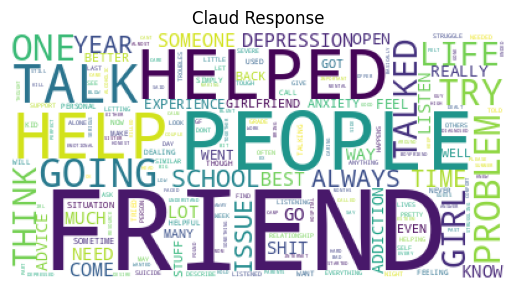

In [ ]:
def cloud(text): # function to create wordcloud
    wordcloud = WordCloud(background_color="white").generate(" ".join([i for i in text.str.upper()]))
    #generate(text) is syntax , but
    #text = " ".join(review for review in df.country_description)  where df is dataframe , country_Dessc is column
    plt.imshow(wordcloud) # Display the generated image:
    plt.axis("off")  # create a border  around the wordcloud
    plt.title("Claud Response")


cloud(df['new_response_text'])

In [ ]:
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7

In [ ]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.75

In [ ]:
rf = ExtraTreesClassifier()
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.85

In [ ]:
rf = DecisionTreeClassifier()
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.75

# Apply model

In [ ]:
df.replace(('flagged','not_flagged'),(1,0),inplace=True)
df.head()

,response_id,class,response_text,new_response_text
0,response_1,0,i try and avoid this sort of conflict,i try and avoid this sort of conflict
1,response_2,1,had a friend open up to me about his mental ad...,had a friend open up to me about his mental ad...
2,response_3,1,i saved a girl from suicide once. she was goin...,i saved a girl from suicide once. she was goin...
3,response_4,0,i cant think of one really...i think i may hav...,i cant think of one really...i think i may hav...
4,response_5,0,only really one friend who doesn't fit into th...,only really one friend who doesn't fit into th...


In [ ]:
text = df["new_response_text"]


In [ ]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(text.values)


In [ ]:
tsne = TSNE(
    n_components=2,
    init='random', # pca
    random_state=34,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119036
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 67.7453232, gradient norm = 0.6631832 (50 iterations in 0.037s)
[t-SNE] Iteration 100: error = 65.0064545, gradient norm = 0.7964350 (50 iterations in 0.054s)
[t-SNE] Iteration 150: error = 73.0126953, gradient norm = 0.3499564 (50 iterations in 0.054s)
[t-SNE] Iteration 200: error = 71.5092773, gradient norm = 0.3677813 (50 iterations in 0.074s)
[t-SNE] Iteration 250: error = 65.5285492, gradient norm = 1.0221703 (50 iterations in 0.046s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.528549
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234

In [ ]:
df['label'] = Encode.fit_transform(df['class'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences=df['label'].tolist()
labels=df['class'].tolist()

In [ ]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 300
embedding_dim = 16
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_sentences = [str (item) for item in training_sentences]
testing_sentences = [str (item) for item in testing_sentences]

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 16)            4800      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4,909
Trainable params: 4,909
Non-trainable params: 0
_________________________________________________________________


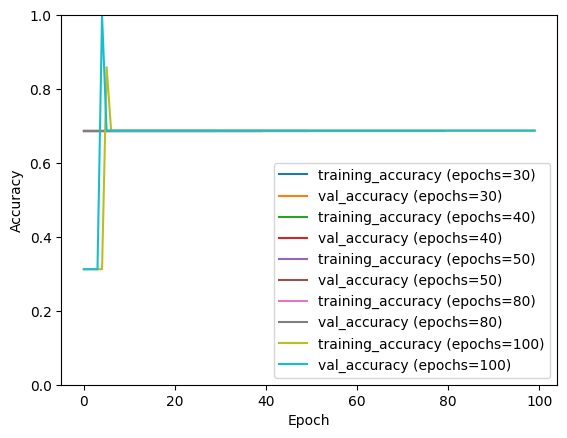

In [ ]:


# Define a list of epoch values to try
epochs_to_try = [ 30, 40, 50, 80, 100]

for num_epochs in epochs_to_try:
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), verbose=0)

    # Plotting accuracy over epochs for this iteration
    plt.plot(history.history['accuracy'], label=f'training_accuracy (epochs={num_epochs})')
    plt.plot(history.history['val_accuracy'], label=f'val_accuracy (epochs={num_epochs})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


## LSTM

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

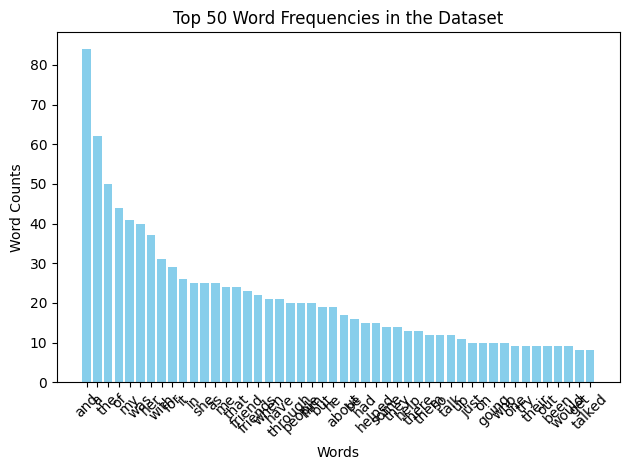

In [122]:
import matplotlib.pyplot as plt

all_words = df['new_response_text'].str.split(expand=True).unstack().value_counts()

plt.bar(all_words.index.values[2:50], all_words.values[2:50], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Word Counts')
plt.title('Top 50 Word Frequencies in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(df['new_response_text']).toarray()
print("Top {} Most Used Words: {}".format(max_features, count_vectorizer.get_feature_names_out()))

Top 100 Most Used Words: ['about' 'addiction' 'advice' 'all' 'always' 'and' 'are' 'as' 'at' 'back'
 'be' 'because' 'been' 'before' 'being' 'best' 'better' 'but' 'can' 'come'
 'depression' 'even' 'feel' 'for' 'friend' 'friends' 'from' 'get' 'girl'
 'go' 'going' 'had' 'have' 'he' 'help' 'helped' 'her' 'him' 'his' 'how'
 'if' 'in' 'is' 'issues' 'it' 'just' 'know' 'life' 'listen' 'll' 'lot'
 'me' 'more' 'much' 'my' 'not' 'of' 'on' 'one' 'open' 'or' 'other' 'out'
 'over' 'people' 'problems' 're' 'really' 'same' 'school' 'she' 'shit'
 'so' 'some' 'someone' 'talk' 'talked' 'that' 'the' 'their' 'them' 'there'
 'they' 'think' 'this' 'through' 'to' 'too' 'try' 'up' 've' 'was' 'what'
 'when' 'while' 'who' 'with' 'would' 'years' 'you']


In [ ]:
y = df['class'].values
x = sparce_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(x_train, y_train)
accuracy_svm = svm.score(x_test, y_test)
print("SVM Accuracy: {:.2f}".format(accuracy_svm))

SVM Accuracy: 0.69


In [ ]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1)))  # Assuming 1D input
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_lstm = lstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("LSTM Model Accuracy: {:.2f}".format(accuracy_lstm))

1/1 [==============================] - 1s 500ms/step - loss: 0.5873 - accuracy: 0.8125
LSTM Model Accuracy: 0.81


1/1 [==============================] - 1s 502ms/step - loss: 0.5124 - accuracy: 0.7500


1/1 [==============================] - 1s 508ms/step - loss: 0.4721 - accuracy: 0.8125


1/1 [==============================] - 0s 498ms/step - loss: 0.5024 - accuracy: 0.8750


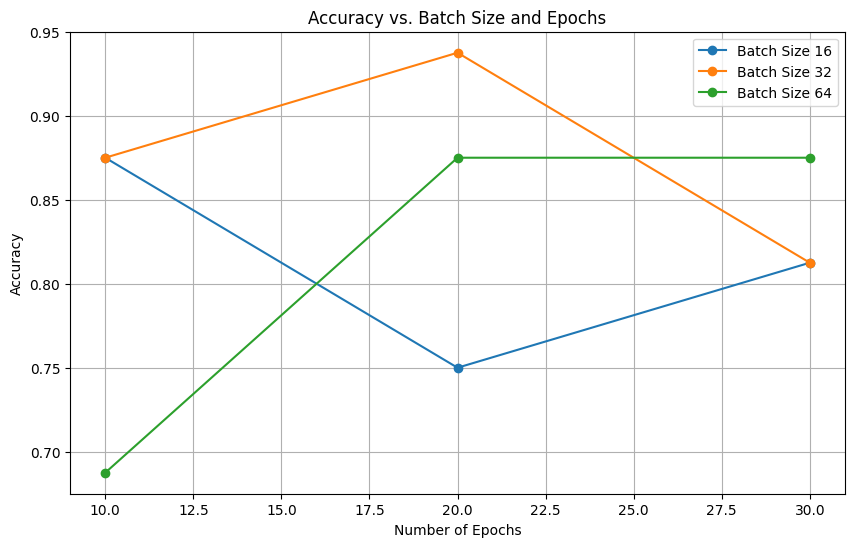

In [ ]:
batch_sizes = [16, 32, 64]
epochs = [10, 20, 30]
accuracy_results = []

for batch_size in batch_sizes:
    batch_accuracy = []
    for num_epochs in epochs:
        lstm_model = Sequential()
        lstm_model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1)))
        lstm_model.add(Dense(1, activation='sigmoid'))
        lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        lstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
        accuracy = lstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
        batch_accuracy.append(accuracy)
    accuracy_results.append(batch_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, accuracy_results[i], marker='o', label=f'Batch Size {batch_size}')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size and Epochs')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 1s 509ms/step - loss: 0.5247 - accuracy: 0.8750


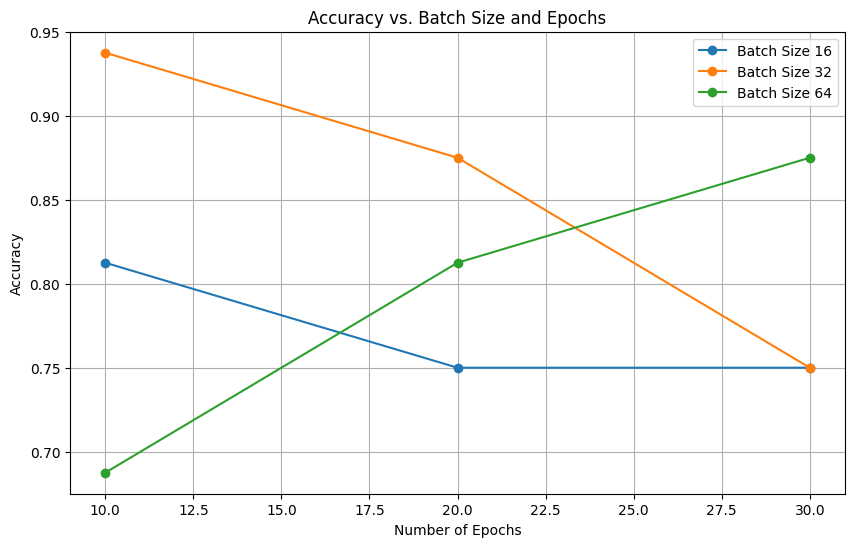

Best Accuracy: 0.94
Best Configuration - Batch Size: 32, Epochs: 10


In [ ]:
batch_sizes = [16, 32, 64]
epochs = [10, 20, 30]
accuracy_results = []
best_accuracy = 0
best_config = (0, 0)  # To store batch size and epoch with best accuracy

for batch_size in batch_sizes:
    batch_accuracy = []
    for num_epochs in epochs:
        lstm_model = Sequential()
        lstm_model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1)))
        lstm_model.add(Dense(1, activation='sigmoid'))
        lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        lstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
        accuracy = lstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
        batch_accuracy.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = (batch_size, num_epochs)

    accuracy_results.append(batch_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, accuracy_results[i], marker='o', label=f'Batch Size {batch_size}')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size and Epochs')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Configuration - Batch Size: {best_config[0]}, Epochs: {best_config[1]}")

In [ ]:

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn = cnn_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("CNN Model Accuracy: {:.2f}".format(accuracy_cnn))

1/1 [==============================] - 0s 150ms/step - loss: 0.7263 - accuracy: 0.6875
CNN Model Accuracy: 0.69


1/1 [==============================] - 0s 144ms/step - loss: 0.6901 - accuracy: 0.6250


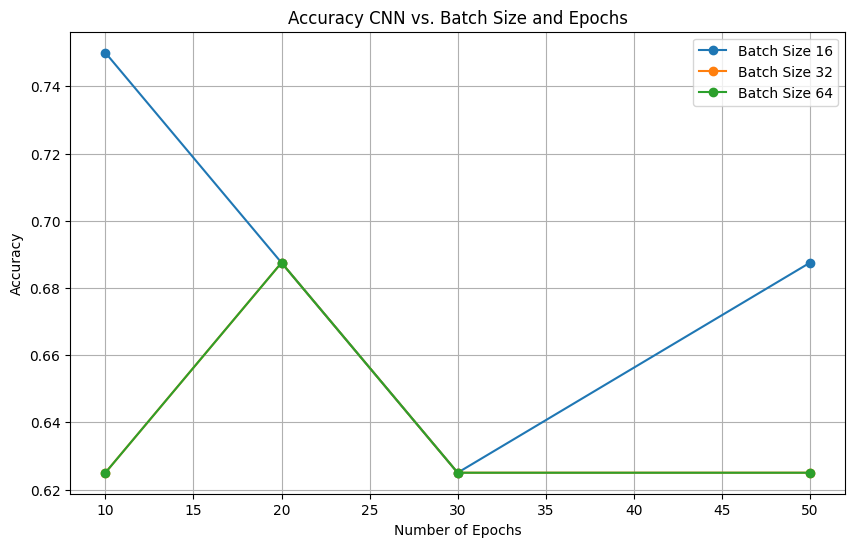

In [ ]:
batch_sizes = [16, 32, 64]
epochs = [10, 20, 30,50]
accuracy_results = []

for batch_size in batch_sizes:
    batch_accuracy = []
    for num_epochs in epochs:
        cnn_model = Sequential()
        cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
        cnn_model.add(MaxPooling1D(pool_size=2))
        cnn_model.add(Flatten())
        cnn_model.add(Dense(1, activation='sigmoid'))
        cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        cnn_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
        accuracy_cnn = cnn_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
        batch_accuracy.append(accuracy_cnn)
    accuracy_results.append(batch_accuracy)
# Plotting the results
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, accuracy_results[i], marker='o', label=f'Batch Size {batch_size}')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy CNN vs. Batch Size and Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# CNN-BiLSTM Model
cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Bidirectional(LSTM(64)))
cnn_bilstm_model.add(Dense(1, activation='sigmoid'))
cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_bilstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn_bilstm = cnn_bilstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("CNN-BiLSTM Model Accuracy: {:.2f}".format(accuracy_cnn_bilstm))



1/1 [==============================] - 2s 2s/step - loss: 0.5241 - accuracy: 0.7500
CNN-BiLSTM Model Accuracy: 0.75


1/1 [==============================] - 1s 1s/step - loss: 0.5698 - accuracy: 0.6250


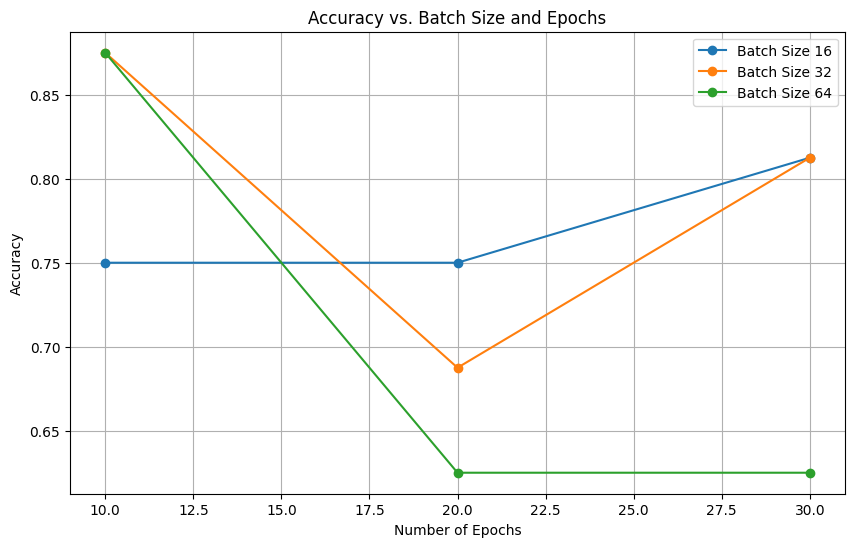

Best Accuracy: 0.88
Best Configuration - Batch Size: 16, Epochs: 10


In [ ]:
batch_sizes = [16, 32, 64]
epochs = [10, 20, 30]
accuracy_results = []
best_accuracy = 0
best_config = (0, 0)  # To store batch size and epoch with best accuracy

for batch_size in batch_sizes:
    batch_accuracy = []
    for num_epochs in epochs:
        cnn_bilstm_model = Sequential()
        cnn_bilstm_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
        cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
        cnn_bilstm_model.add(Bidirectional(LSTM(64)))
        cnn_bilstm_model.add(Dense(1, activation='sigmoid'))
        cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        cnn_bilstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)
        accuracy_cnn_bilstm = cnn_bilstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
        batch_accuracy.append(accuracy_cnn_bilstm)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = (batch_size, num_epochs)

    accuracy_results.append(batch_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(epochs, accuracy_results[i], marker='o', label=f'Batch Size {batch_size}')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size and Epochs')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Configuration - Batch Size: {best_config[0]}, Epochs: {best_config[1]}")

# LDA

 Latent Dirichlet Allocation
Finally we arrive on the subject of topic modelling and the implementation of a couple of unsupervised learning algorithms. The first method that I will touch upon is Latent Dirichlet Allocation. Now there are a couple of different implements of this LDA algorithm but in this notebook, I will be using Sklearn's implementation. Another very well-known LDA implementation is Radim Rehurek's gensim, so check it out as well.

Corpus - Document - Word : Topic Generation

In LDA, the modelling process revolves around three things: the text corpus, its collection of documents, D and the words W in the documents. Therefore the algorithm attempts to uncover K topics from this corpus via the following way (illustrated by the diagram)

Three_Level Bayesian Model

Model each topic, $\kappa$ via a Dirichlet prior distribution given by $\beta_{k}$:


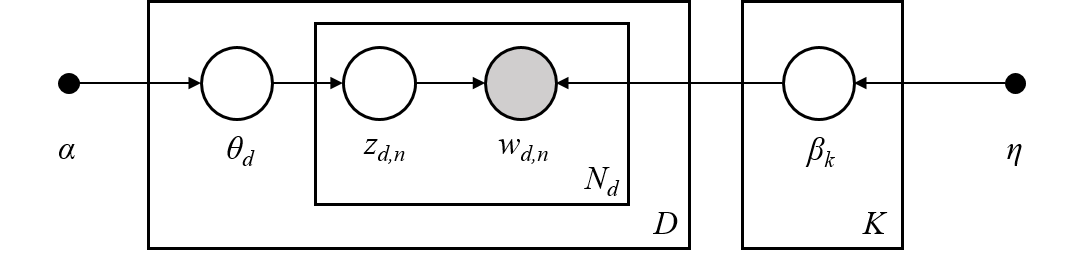
Model each document d by another Dirichlet distribution parameterized by $\alpha$:



Subsequently for document d, we generate a topic via a multinomial distribution which we then backtrack and use to generate the correspondings words related to that topic via another multinomial distribution:



(Image source: http://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)

The LDA algorithm first models documents via a mixture model of topics. From these topics, words are then assigned weights based on the probability distribution of these topics. It is this probabilistic assignment over words that allow a user of LDA to say how likely a particular word falls into a topic. Subsequently from the collection of words assigned to a particular topic, are we thus able to gain an insight as to what that topic may actually represent from a lexical point of view.

From a standard LDA model, there are really a few key parameters that we have to keep in mind and consider programmatically tuning before we invoke the model:

n_components: The number of topics that you specify to the model
$\alpha$ parameter: This is the dirichlet parameter that can be linked to the document topic prior
$\beta$ parameter: This is the dirichlet parameter linked to the topic word prior
To invoke the algorithm, we simply create an LDA instance through the Sklearn's LatentDirichletAllocation function. The various parameters would ideally have been obtained through some sort of validation scheme. In this instance, the optimal value of n_components (or topic number) was found by conducting a KMeans + Latent Semantic Analysis Scheme (as shown in this paper here) whereby the number of Kmeans clusters and number of LSA dimensions were iterated through and the best silhouette mean score.

In [128]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [129]:
lda.fit(Tf_idf)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [137]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = count_vectorizer.get_feature_names_out()
print(lda, tf_feature_names, n_top_words)


Topics in LDA model: 
LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0) ['about' 'addiction' 'advice' 'all' 'always' 'and' 'are' 'as' 'at' 'back'
 'be' 'because' 'been' 'before' 'being' 'best' 'better' 'but' 'can' 'come'
 'depression' 'even' 'feel' 'for' 'friend' 'friends' 'from' 'get' 'girl'
 'go' 'going' 'had' 'have' 'he' 'help' 'helped' 'her' 'him' 'his' 'how'
 'if' 'in' 'is' 'issues' 'it' 'just' 'know' 'life' 'listen' 'll' 'lot'
 'me' 'more' 'much' 'my' 'not' 'of' 'on' 'one' 'open' 'or' 'other' 'out'
 'over' 'people' 'problems' 're' 'really' 'same' 'school' 'she' 'shit'
 'so' 'some' 'someone' 'talk' 'talked' 'that' 'the' 'their' 'them' 'there'
 'they' 'think' 'this' 'through' 'to' 'too' 'try' 'up' 've' 'was' 'what'
 'when' 'while' 'who' 'with' 'would' 'years' 'you'] 40


# ANN model

In [141]:
df

,response_id,class,response_text,new_response_text,label
0,response_1,0,i try and avoid this sort of conflict,i try and avoid this sort of conflict,0
1,response_2,1,had a friend open up to me about his mental ad...,had a friend open up to me about his mental ad...,1
2,response_3,1,i saved a girl from suicide once. she was goin...,i saved a girl from suicide once. she was goin...,1
3,response_4,0,i cant think of one really...i think i may hav...,i cant think of one really...i think i may hav...,0
4,response_5,0,only really one friend who doesn't fit into th...,only really one friend who doesn't fit into th...,0
...,...,...,...,...,...
75,response_76,0,"now that i've been through it, although i'm no...","now that i've been through it, although i'm no...",0
76,response_77,1,when my best friends mom past away from od'ing...,when my best friends mom past away from od'ing...,1
77,response_78,0,as a camp counselor i provide stability in kid...,as a camp counselor i provide stability in kid...,0
78,response_79,1,my now girlfriend used to have serious addicti...,my now girlfriend used to have serious addicti...,1


In [159]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


In [160]:
contractions_dict = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'll": "he shall / he will",
    "he's": "he is",
    "I'd": "I had / I would",
    "I'll": "I shall / I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'll": "it shall / it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she had / she would",
    "she'll": "she shall / she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had / they would",
    "they'll": "they shall / they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'll": "we shall / we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who had / who would",
    "who'll": "who shall / who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you had / you would",
    "you'll": "you shall / you will",
    "you're": "you are",
    "you've": "you have"
}

In [161]:
def cleaning_with_re(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', tweet)

    # remove hashtag (#)
    tweet = re.sub(r'#', '', tweet)

    #replaces newline (\n) and carriage return (\r) characters in a tweet with an empty string
    tweet = re.sub(r'[\n\r]', '', tweet)

    #replaces the numbers with an empty string
    tweet = re.sub(r'\d+', '', tweet)

    return tweet

#----------------------------------------------------------------
def expanding_words(tweet):

    words = tweet.split()
    expanded_words = []
    for word in words:
        if word.lower() in contractions_dict:
            expanded_words.extend(contractions_dict[word.lower()].split("/"))
        else:
            expanded_words.append(word)
    return " ".join(expanded_words)

#----------------------------------------------------------------
def tokenizing(tweet):

    stopwords_english = stopwords.words('english')
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    new_tweet = tokenizer.tokenize(tweet)

    clean_tweet=[]

    for word in new_tweet: # Going through every word in tokens list
        if (word not in stopwords_english and word not in string.punctuation):  # remove punctuation and stopwords
            clean_tweet.append(word)

    return clean_tweet

#----------------------------------------------------------------
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer()

    # Create an empty list to store the stems
    stemmed_tweets = []

    for word in tweet:
        stem_word = stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list

    return stemmed_tweets

In [162]:
def preprocessing(tweet):

    tweet=cleaning_with_re(tweet)
    tweet=expanding_words(tweet)
    tweet=tokenizing(tweet)
    tweet=stemming(tweet)

    return tweet

In [163]:
def build_freqs(listoftweets, labels):

    labelslist = np.squeeze(labels).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets and all the words in them
    freqs = {}
    for y, tweet in zip(labels, listoftweets):
        t=preprocessing(tweet)
        for word in t:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    # Calculate the sum of frequencies for each word
    word_sums = {}
    for (word, y), count in freqs.items():
        if word in word_sums:
            word_sums[word] += count
        else:
            word_sums[word] = count

    # Divide each key of word and class by the sum
    for (word, y), count in freqs.items():
        freqs[(word, y)] /= word_sums[word]

    return freqs

#------------------------------------------------------------------
def extract_features(tweet, freqs, preprocessing=preprocessing):

    # process_tweet tokenizes, stems, and removes stopwords
    word_list = preprocessing(tweet)

    # 2 elements for [ positive, negative] counts
    features = np.zeros(2)

    # loop through each word in the list of words
    for word in word_list:

        # increment the word count for the positive label 1
        features[0] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        features[1] += freqs.get((word, 0),0)

    features = features[None, :]
    assert(features.shape == (1, 2))
    return features

In [164]:
word_frequencies= build_freqs(df['response_text'].tolist(), df['class'].tolist())


In [165]:
X = np.zeros((len(df['class']), 2))

for i in range(len(df['class'])):
    X[i, :]= extract_features(df['new_response_text'][i], word_frequencies)

print(X)

# training labels corresponding to X
Y = np.array(df['class'])

[[  0.57142857   3.42857143]
 [  6.79333333   2.20666667]
 [  8.50323529   2.49676471]
 [  1.55555556   6.44444444]
 [  7.50256854  22.49743146]
 [  6.02233439   6.97766561]
 [  6.67156863   1.32843137]
 [ 12.26116259   6.73883741]
 [  3.63505495   5.36494505]
 [ 14.53076923   4.46923077]
 [  5.71465465  21.28534535]
 [  6.42666667   1.57333333]
 [  1.51576577   3.48423423]
 [  0.25         0.75      ]
 [  0.5          0.5       ]
 [  7.76666667   1.23333333]
 [  1.72576577   5.27423423]
 [  1.22576577   1.77423423]
 [  2.54166667   4.45833333]
 [  1.87666667   9.12333333]
 [  0.45299145   2.54700855]
 [  3.9          2.1       ]
 [ 19.35991981  10.64008019]
 [  4.73052767  11.26947233]
 [  2.30793226   5.69206774]
 [ 14.21         2.79      ]
 [  9.43243243   1.56756757]
 [  1.36410256   6.63589744]
 [  3.39243243   1.60756757]
 [  1.96576577  12.03423423]
 [  1.625        3.375     ]
 [  2.68571429   4.31428571]
 [  1.48076923   7.51923077]
 [  3.46904762  17.53095238]
 [  1.77333333

In [166]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer with logistic regression

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=60, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/60
3/3 [==============================] - 3s 7ms/step - loss: 2.3036 - accuracy: 0.6750
Epoch 2/60
3/3 [==============================] - 0s 19ms/step - loss: 2.3615 - accuracy: 0.6375
Epoch 3/60
3/3 [==============================] - 0s 20ms/step - loss: 3.1344 - accuracy: 0.6125
Epoch 4/60
3/3 [==============================] - 0s 13ms/step - loss: 3.1098 - accuracy: 0.6250
Epoch 5/60
3/3 [==============================] - 0s 39ms/step - loss: 2.9902 - accuracy: 0.6625
Epoch 6/60
3/3 [==============================] - 0s 27ms/step - loss: 2.6319 - accuracy: 0.7000
Epoch 7/60
3/3 [==============================] - 0s 12ms/step - loss: 2.7480 - accuracy: 0.7125
Epoch 8/60
3/3 [==============================] - 0s 26ms/step - loss: 2.8455 - accuracy: 0.6875
Epoch 9/60
3/3 [==============================] - 0s 22ms/step - loss: 2.7243 - accuracy: 0.7000
Epoch 10/60
3/3 [==============================] - 0s 30ms/step - loss: 2.3476 - accuracy: 0.7000
Epoch 11/60
3/3 [=============

In [172]:
X_test = np.zeros((len(df['class']), 2))
for i in range(len(df['class'])):
    X_test[i, :]= extract_features(df['response_text'][i], word_frequencies)
print(X_test)

[[  0.57142857   3.42857143]
 [  6.79333333   2.20666667]
 [  8.50323529   2.49676471]
 [  1.55555556   6.44444444]
 [  7.50256854  22.49743146]
 [  6.02233439   6.97766561]
 [  6.67156863   1.32843137]
 [ 12.26116259   6.73883741]
 [  3.63505495   5.36494505]
 [ 14.53076923   4.46923077]
 [  5.71465465  21.28534535]
 [  6.42666667   1.57333333]
 [  1.51576577   3.48423423]
 [  0.25         0.75      ]
 [  0.5          0.5       ]
 [  7.76666667   1.23333333]
 [  1.72576577   5.27423423]
 [  1.22576577   1.77423423]
 [  2.54166667   4.45833333]
 [  1.87666667   9.12333333]
 [  0.45299145   2.54700855]
 [  3.9          2.1       ]
 [ 19.35991981  10.64008019]
 [  4.73052767  11.26947233]
 [  2.30793226   5.69206774]
 [ 14.21         2.79      ]
 [  9.43243243   1.56756757]
 [  1.36410256   6.63589744]
 [  3.39243243   1.60756757]
 [  1.96576577  12.03423423]
 [  1.625        3.375     ]
 [  2.68571429   4.31428571]
 [  1.48076923   7.51923077]
 [  3.46904762  17.53095238]
 [  1.77333333

In [175]:
y_prob = model.predict(X_test)
y_pred = np.round(y_prob).flatten()
Y_test = df['class'].tolist()

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Test set accuracy = {accuracy}")
print(f"Test set precision = {precision}")
print(f"Test set recall = {recall}")
print(f"Test set F1 score = {f1}")

3/3 [==============================] - 0s 11ms/step
Test set accuracy = 0.65
Test set precision = 0.0
Test set recall = 0.0
Test set F1 score = 0.0


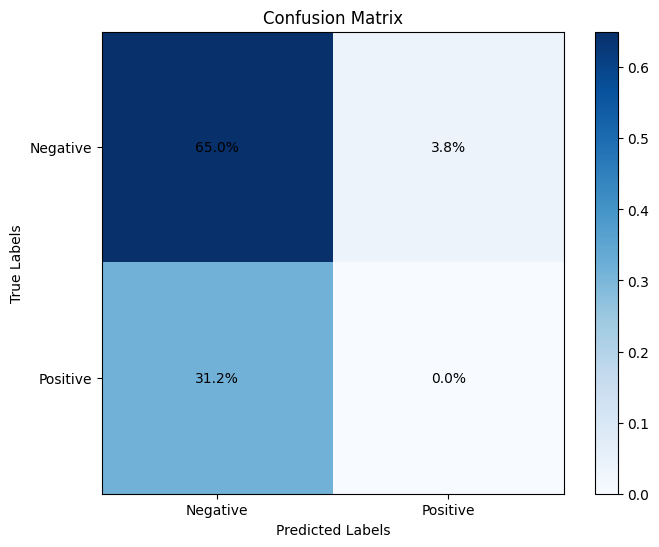

In [179]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm / np.sum(cm)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
plt.imshow(cm_norm, cmap=plt.cm.Blues)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Display the percentages in the plot
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(j, i, '{:.1%}'.format(cm_norm[i, j]), ha='center', va='center')

# Remove the grid lines
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

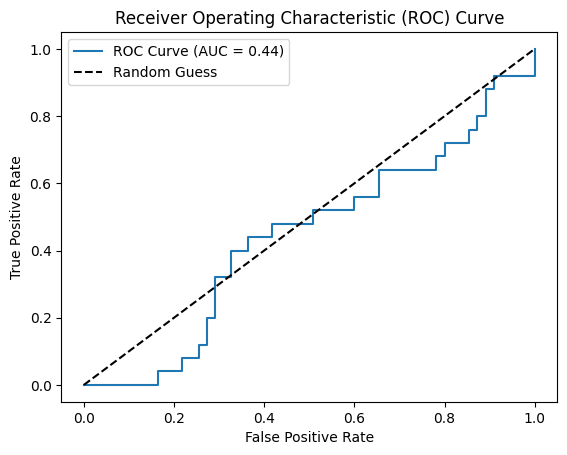

In [177]:
# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()